# Prediction of human R-loop binding proteins

In [1]:
import numpy as np
import pandas as pd

### Read data

In [ ]:
The data Files include:
# Negative class
Human Proteome_30 features.csv #Human proteome list  

# Postive classes
IP-MS R-loop binding proteins list (UniprotIDs) # Immuno-precipitation coupled with mass spectrometry (IP-MS) 
Prox-MS R-loop binding proteins list (UniprotIDs) # proximity-labeling approach to characterize the R-loop interactome where 
# biotinylated proteins were purified using streptavidin affinity coupled with mass spectrometry (Prox-MS) 

#### 1. Main data set

In [2]:
#Loading the main dataset with all 30 features
hp30  = pd.read_csv('Human Proteome_30 features.csv')
hp30.head()  # Display the first five rows of the data frame

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,N,P,Q,R,S,T,V,W,Y,AIndex
0,A0AUZ9,-0.694225,79.94,0.244,1.839665,987,8,0.40,0,20.36470,...,5.3,4.9,5.9,4.7,12.0,5.9,4.2,1.6,2.2,75.096251
1,A0AV02,0.321289,24.65,0.145,-5.359707,714,4,0.91,0,19.46780,...,2.5,4.8,5.2,3.6,9.1,5.2,7.7,2.0,2.8,101.162465
2,A0AV96,-0.234401,21.75,6.820,0.201380,593,15,3.26,1,20.23610,...,3.2,7.8,3.4,5.7,4.2,4.0,7.6,0.5,5.9,75.801012
3,A0AVF1,-0.333394,4.51,0.741,-0.601287,554,4,-0.65,0,5.95668,...,5.2,2.3,4.7,5.2,5.4,3.1,4.9,1.1,6.0,87.725632
4,A0AVI4,0.175138,2.76,0.102,-2.463284,362,3,0.30,0,4.97238,...,1.9,5.5,4.7,6.6,6.6,7.5,8.6,2.8,2.8,94.060773


In [3]:
#display the size of the file
hp30.shape

(16929, 31)

The 'Human Proteome_30 features' file has 16929 rows and 31 features

In [4]:
#display the features
hp30.columns

Index(['UniprotID', 'GRAVY', 'DISOPRED3', 'PaxDB', 'CamSol', 'Length',
       'Phosphosite', 'Pscore', 'NucAcid.Binding', 'LCRs', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',
       'W', 'Y', 'AIndex'],
      dtype='object')

In [5]:
#check for duplicate records
hp30.duplicated().sum()

0

In [6]:
#check for null values
hp30.isnull().sum()

UniprotID          0
GRAVY              0
DISOPRED3          0
PaxDB              0
CamSol             0
Length             0
Phosphosite        0
Pscore             0
NucAcid.Binding    0
LCRs               0
A                  0
C                  0
D                  0
E                  0
F                  0
G                  0
H                  0
I                  0
K                  0
L                  0
M                  0
N                  0
P                  0
Q                  0
R                  0
S                  0
T                  0
V                  0
W                  0
Y                  0
AIndex             0
dtype: int64

In [7]:
#Display the data frame details
hp30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniprotID        16929 non-null  object 
 1   GRAVY            16929 non-null  float64
 2   DISOPRED3        16929 non-null  float64
 3   PaxDB            16929 non-null  float64
 4   CamSol           16929 non-null  float64
 5   Length           16929 non-null  int64  
 6   Phosphosite      16929 non-null  int64  
 7   Pscore           16929 non-null  float64
 8   NucAcid.Binding  16929 non-null  int64  
 9   LCRs             16929 non-null  float64
 10  A                16929 non-null  float64
 11  C                16929 non-null  float64
 12  D                16929 non-null  float64
 13  E                16929 non-null  float64
 14  F                16929 non-null  float64
 15  G                16929 non-null  float64
 16  H                16929 non-null  float64
 17  I           

In [8]:
#display the descriptive statistics
hp30.describe()

,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,A,...,N,P,Q,R,S,T,V,W,Y,AIndex
count,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,...,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000,16929.000000
mean,-0.353455,27.193572,45.557879,0.277878,618.094512,13.676000,1.146210,0.200307,12.360832,7.216699,...,3.513817,6.173867,4.594447,5.774724,7.983313,5.158249,6.033889,1.283011,2.786934,81.243504
std,0.405789,23.844382,391.594687,2.186991,551.282421,21.838834,1.647086,0.400242,12.976218,2.599333,...,1.465907,2.953076,1.762960,2.134996,2.532232,1.593640,1.811113,0.839465,1.280789,16.456842
min,-2.504838,0.000000,0.001000,-9.515408,140.000000,0.000000,-3.120000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,8.831579
25%,-0.603018,8.610000,0.229000,-0.608624,311.000000,3.000000,0.060000,0.000000,0.000000,5.500000,...,2.500000,4.200000,3.500000,4.400000,6.300000,4.200000,4.800000,0.700000,1.900000,71.010453
50%,-0.370806,19.030000,0.963000,0.595931,467.000000,7.000000,0.870000,0.000000,9.960160,6.800000,...,3.500000,5.600000,4.400000,5.500000,7.700000,5.100000,6.000000,1.100000,2.700000,81.523810
75%,-0.150756,40.090000,8.430000,1.605422,731.000000,16.000000,1.940000,0.000000,19.776900,8.500000,...,4.500000,7.400000,5.500000,6.900000,9.300000,6.000000,7.200000,1.700000,3.600000,91.119134
max,1.070690,100.000000,24741.000000,14.148038,9999.000000,720.000000,18.480000,1.000000,82.014400,30.700000,...,11.900000,37.000000,26.400000,25.200000,67.100000,34.900000,17.800000,7.700000,10.300000,145.742188


In [9]:
#Check for unique values
hp30.nunique()

UniprotID          16929
GRAVY              16674
DISOPRED3           6484
PaxDB               3226
CamSol             16888
Length              2002
Phosphosite          191
Pscore               973
NucAcid.Binding        2
LCRs                9379
A                    207
C                    165
D                    136
E                    215
F                    114
G                    234
H                    105
I                    127
K                    193
L                    219
M                     82
N                    102
P                    224
Q                    155
R                    191
S                    212
T                    159
V                    130
W                     64
Y                     92
AIndex             16360
dtype: int64

#### 2. R-loop binding proteins (RLBPs) data set

In [10]:
# A. 
# Loading the R-loop binding proteins (RLBPs) file - 'IP-MS R-loop binding proteins list.txt'
rloopdata  = pd.read_csv('IP-MS R-loop binding proteins list.txt')
# Display the contents
rloopdata.head() # Display the first five rows of the data frame

,UniprotID
0,Q9BVP2
1,P31943
2,Q9HCE1
3,P43243
4,P17844


In [11]:
rloopdata.shape

(292, 1)

In [12]:
#Display the R-loop data frame details
rloopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UniprotID  292 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


The 'IP-MS R-loop binding proteins list.txt' file has 292 entries with a single column 'UniprotID'

In [13]:
# B. Prox-MS R-loop binding proteins
# Loading the R-loop binding proteins (RLBPs) file - 'Prox-MS R-loop binding proteins list.txt'
rloopdata_prox_MS  = pd.read_csv('Prox-MS R-loop binding proteins list.txt')
# Display the contents
rloopdata_prox_MS.head() # Display the first five rows of the data frame

,UniprotID
0,O75940
1,Q9UBD5
2,O15042
3,Q14119
4,Q14676


In [14]:
rloopdata_prox_MS.shape

(101, 1)

The 'Prox-MS R-loop binding proteins list.txt' file has 101 entries with a single column 'UniprotID'

In [14]:
#merge the rloop binding protein lists
rloop_merged = pd.concat([rloopdata, rloopdata_prox_MS])
rloop_merged

,UniprotID
0,Q9BVP2
1,P31943
2,Q9HCE1
3,P43243
4,P17844
...,...
96,P09429
97,P09874
98,Q02241
99,P11387


In [15]:
#check for duplicates in r-loop merged data
rloop_merged.duplicated().sum()

23

In [16]:
#Display the duplicated r-loop data records
duplicateRows = rloop_merged[rloop_merged.duplicated()]
duplicateRows

,UniprotID
6,P17844
11,Q9H0A0
13,O00567
16,Q96PK6
17,P46777
19,Q9BZE4
23,P06748
24,P46087
26,P11388
27,Q9NVP1


In [17]:
#Extract the features for RLBPs by merging DF's merged rloopdata and hp30
rloop = rloop_merged.merge(hp30,on=['UniprotID'])
rloop #Display the DF

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,N,P,Q,R,S,T,V,W,Y,AIndex
0,Q9BVP2,-0.706922,45.54,60.70,2.861457,549,21,0.60,1,12.20400,...,4.0,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077
1,P31943,-0.602227,26.28,502.00,1.519683,449,42,8.30,1,20.04450,...,4.2,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875
2,Q9HCE1,-0.307478,6.78,26.50,-0.213624,1003,32,0.40,1,13.26020,...,2.6,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398
3,P43243,-0.928571,73.67,279.00,3.575102,847,90,2.63,1,7.67414,...,4.6,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969
4,P17844,-0.641368,28.66,217.00,1.377189,614,35,2.99,1,0.00000,...,5.4,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,P09429,-1.610233,50.23,1502.00,4.808842,215,17,0.74,1,36.74420,...,1.9,6.0,0.9,3.7,5.1,2.3,2.3,0.9,3.3,30.093023
373,P09874,-0.536489,15.09,466.00,1.570925,1014,51,1.30,1,12.42600,...,3.6,4.3,3.4,3.3,8.4,4.1,6.7,1.3,3.2,79.132150
374,Q02241,-0.819688,35.83,5.35,2.127429,960,57,0.78,0,0.00000,...,5.3,5.4,6.4,7.6,6.5,6.1,6.8,0.7,2.6,70.635417
375,P11387,-1.290458,43.53,117.00,4.488998,765,26,0.71,1,36.07840,...,4.7,4.8,3.4,5.5,4.1,3.5,3.9,1.7,2.7,58.915033


The data frame with R-Loop binding proteins has 377 rows with all 30 features. The RLBPs without features are excluded.

In [19]:
#Check for duplicate records
rloop.duplicated().sum()

22

In [20]:
#remove the duplicate records
rloop.drop_duplicates(inplace=True)
rloop

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,N,P,Q,R,S,T,V,W,Y,AIndex
0,Q9BVP2,-0.706922,45.54,60.70,2.861457,549,21,0.60,1,12.20400,...,4.0,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077
1,P31943,-0.602227,26.28,502.00,1.519683,449,42,8.30,1,20.04450,...,4.2,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875
2,Q9HCE1,-0.307478,6.78,26.50,-0.213624,1003,32,0.40,1,13.26020,...,2.6,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398
3,P43243,-0.928571,73.67,279.00,3.575102,847,90,2.63,1,7.67414,...,4.6,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969
4,P17844,-0.641368,28.66,217.00,1.377189,614,35,2.99,1,0.00000,...,5.4,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,P09429,-1.610233,50.23,1502.00,4.808842,215,17,0.74,1,36.74420,...,1.9,6.0,0.9,3.7,5.1,2.3,2.3,0.9,3.3,30.093023
373,P09874,-0.536489,15.09,466.00,1.570925,1014,51,1.30,1,12.42600,...,3.6,4.3,3.4,3.3,8.4,4.1,6.7,1.3,3.2,79.132150
374,Q02241,-0.819688,35.83,5.35,2.127429,960,57,0.78,0,0.00000,...,5.3,5.4,6.4,7.6,6.5,6.1,6.8,0.7,2.6,70.635417
375,P11387,-1.290458,43.53,117.00,4.488998,765,26,0.71,1,36.07840,...,4.7,4.8,3.4,5.5,4.1,3.5,3.9,1.7,2.7,58.915033


Now, the data frame with R-Loop binding proteins has 355 rows with all 30 features after removing duplicates. The RLBPs without features are excluded.

In [21]:
#Exclude the RLBPs records from the human proteome list
merge_df = pd.concat([hp30, rloop])
hpme = merge_df.drop_duplicates(keep=False)
hpme #Display the content

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,N,P,Q,R,S,T,V,W,Y,AIndex
0,A0AUZ9,-0.694225,79.94,0.244,1.839665,987,8,0.40,0,20.36470,...,5.3,4.9,5.9,4.7,12.0,5.9,4.2,1.6,2.2,75.096251
1,A0AV02,0.321289,24.65,0.145,-5.359707,714,4,0.91,0,19.46780,...,2.5,4.8,5.2,3.6,9.1,5.2,7.7,2.0,2.8,101.162465
2,A0AV96,-0.234401,21.75,6.820,0.201380,593,15,3.26,1,20.23610,...,3.2,7.8,3.4,5.7,4.2,4.0,7.6,0.5,5.9,75.801012
3,A0AVF1,-0.333394,4.51,0.741,-0.601287,554,4,-0.65,0,5.95668,...,5.2,2.3,4.7,5.2,5.4,3.1,4.9,1.1,6.0,87.725632
4,A0AVI4,0.175138,2.76,0.102,-2.463284,362,3,0.30,0,4.97238,...,1.9,5.5,4.7,6.6,6.6,7.5,8.6,2.8,2.8,94.060773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,Q9Y6Y0,-0.301558,2.49,2.820,-0.308894,642,26,1.56,0,6.69782,...,6.7,4.4,3.4,4.0,8.1,4.0,6.9,1.6,4.0,79.859813
16925,Q9Y6Y1,-0.489360,71.85,0.025,-0.105879,1673,15,1.70,1,12.73160,...,3.5,5.9,5.7,4.7,12.7,6.2,6.0,1.3,2.7,69.898386
16926,Q9Y6Y8,-0.415200,52.80,36.700,0.235908,1000,23,2.10,1,8.60000,...,3.5,8.6,5.4,3.6,10.1,4.8,7.0,0.9,3.2,76.400000
16927,Q9Y6Y9,-0.084375,9.38,0.333,-1.187453,160,2,-0.16,0,0.00000,...,5.6,4.4,3.1,3.8,10.6,5.0,5.0,0.6,5.6,82.812500


The human proteome list has 16574 entries after extracting RLBPs records

In [22]:
#Adding column "Group" to help the model distinguish between R (RLBP) and H (Human proteome/non-RLBP)
rloop['Group'] = 'R' # for R-loop
rloop.head() #Display content

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,P,Q,R,S,T,V,W,Y,AIndex,Group
0,Q9BVP2,-0.706922,45.54,60.7,2.861457,549,21,0.60,1,12.20400,...,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077,R
1,P31943,-0.602227,26.28,502.0,1.519683,449,42,8.30,1,20.04450,...,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875,R
2,Q9HCE1,-0.307478,6.78,26.5,-0.213624,1003,32,0.40,1,13.26020,...,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398,R
3,P43243,-0.928571,73.67,279.0,3.575102,847,90,2.63,1,7.67414,...,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969,R
4,P17844,-0.641368,28.66,217.0,1.377189,614,35,2.99,1,0.00000,...,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013,R


In [23]:
#Add column 'Group' for Human Proteome
hpme['Group'] = 'H' 
hpme.head() #Display content

C:\Users\benoy\AppData\Local\Temp\ipykernel_10944\3265776960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpme['Group'] = 'H'


,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,P,Q,R,S,T,V,W,Y,AIndex,Group
0,A0AUZ9,-0.694225,79.94,0.244,1.839665,987,8,0.40,0,20.36470,...,4.9,5.9,4.7,12.0,5.9,4.2,1.6,2.2,75.096251,H
1,A0AV02,0.321289,24.65,0.145,-5.359707,714,4,0.91,0,19.46780,...,4.8,5.2,3.6,9.1,5.2,7.7,2.0,2.8,101.162465,H
2,A0AV96,-0.234401,21.75,6.820,0.201380,593,15,3.26,1,20.23610,...,7.8,3.4,5.7,4.2,4.0,7.6,0.5,5.9,75.801012,H
3,A0AVF1,-0.333394,4.51,0.741,-0.601287,554,4,-0.65,0,5.95668,...,2.3,4.7,5.2,5.4,3.1,4.9,1.1,6.0,87.725632,H
4,A0AVI4,0.175138,2.76,0.102,-2.463284,362,3,0.30,0,4.97238,...,5.5,4.7,6.6,6.6,7.5,8.6,2.8,2.8,94.060773,H


In [24]:
#Create a whole proteome dataset for prediction; RLBP+Human proteome(minus RLBPs)
main = pd.concat([rloop, hpme], ignore_index=True)
main #Display content

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,P,Q,R,S,T,V,W,Y,AIndex,Group
0,Q9BVP2,-0.706922,45.54,60.700,2.861457,549,21,0.60,1,12.20400,...,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077,R
1,P31943,-0.602227,26.28,502.000,1.519683,449,42,8.30,1,20.04450,...,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875,R
2,Q9HCE1,-0.307478,6.78,26.500,-0.213624,1003,32,0.40,1,13.26020,...,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398,R
3,P43243,-0.928571,73.67,279.000,3.575102,847,90,2.63,1,7.67414,...,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969,R
4,P17844,-0.641368,28.66,217.000,1.377189,614,35,2.99,1,0.00000,...,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,Q9Y6Y0,-0.301558,2.49,2.820,-0.308894,642,26,1.56,0,6.69782,...,4.4,3.4,4.0,8.1,4.0,6.9,1.6,4.0,79.859813,H
16925,Q9Y6Y1,-0.489360,71.85,0.025,-0.105879,1673,15,1.70,1,12.73160,...,5.9,5.7,4.7,12.7,6.2,6.0,1.3,2.7,69.898386,H
16926,Q9Y6Y8,-0.415200,52.80,36.700,0.235908,1000,23,2.10,1,8.60000,...,8.6,5.4,3.6,10.1,4.8,7.0,0.9,3.2,76.400000,H
16927,Q9Y6Y9,-0.084375,9.38,0.333,-1.187453,160,2,-0.16,0,0.00000,...,4.4,3.1,3.8,10.6,5.0,5.0,0.6,5.6,82.812500,H


In [25]:
#Write to a csv file

pd.DataFrame(main).to_csv("main_rloop.csv", index = False) 

### Extract features and class

In [2]:
#Read the combined csv file
main = pd.read_csv('main_rloop.csv')
main

,UniprotID,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,...,P,Q,R,S,T,V,W,Y,AIndex,Group
0,Q9BVP2,-0.706922,45.54,60.700,2.861457,549,21,0.60,1,12.20400,...,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077,R
1,P31943,-0.602227,26.28,502.000,1.519683,449,42,8.30,1,20.04450,...,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875,R
2,Q9HCE1,-0.307478,6.78,26.500,-0.213624,1003,32,0.40,1,13.26020,...,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398,R
3,P43243,-0.928571,73.67,279.000,3.575102,847,90,2.63,1,7.67414,...,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969,R
4,P17844,-0.641368,28.66,217.000,1.377189,614,35,2.99,1,0.00000,...,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,Q9Y6Y0,-0.301558,2.49,2.820,-0.308894,642,26,1.56,0,6.69782,...,4.4,3.4,4.0,8.1,4.0,6.9,1.6,4.0,79.859813,H
16925,Q9Y6Y1,-0.489360,71.85,0.025,-0.105879,1673,15,1.70,1,12.73160,...,5.9,5.7,4.7,12.7,6.2,6.0,1.3,2.7,69.898386,H
16926,Q9Y6Y8,-0.415200,52.80,36.700,0.235908,1000,23,2.10,1,8.60000,...,8.6,5.4,3.6,10.1,4.8,7.0,0.9,3.2,76.400000,H
16927,Q9Y6Y9,-0.084375,9.38,0.333,-1.187453,160,2,-0.16,0,0.00000,...,4.4,3.1,3.8,10.6,5.0,5.0,0.6,5.6,82.812500,H


In [3]:
#Separate the features. Let's exclude 'UniprotID' from features
df_features = main.loc[:,'GRAVY':'AIndex']
df_features

,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,A,...,N,P,Q,R,S,T,V,W,Y,AIndex
0,-0.706922,45.54,60.700,2.861457,549,21,0.60,1,12.20400,6.4,...,4.0,5.3,4.6,5.5,8.0,3.8,6.4,0.9,1.8,78.142077
1,-0.602227,26.28,502.000,1.519683,449,42,8.30,1,20.04450,6.5,...,4.2,3.8,4.0,6.9,8.2,3.6,5.6,0.4,5.3,54.743875
2,-0.307478,6.78,26.500,-0.213624,1003,32,0.40,1,13.26020,5.3,...,2.6,7.2,4.0,7.4,5.9,5.1,6.2,1.0,3.2,90.867398
3,-0.928571,73.67,279.000,3.575102,847,90,2.63,1,7.67414,5.9,...,4.6,6.0,4.6,6.0,9.7,3.7,3.3,0.5,3.2,64.757969
4,-0.641368,28.66,217.000,1.377189,614,35,2.99,1,0.00000,7.0,...,5.4,5.0,4.9,8.3,5.4,5.7,5.4,1.0,4.1,70.228013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,-0.301558,2.49,2.820,-0.308894,642,26,1.56,0,6.69782,5.9,...,6.7,4.4,3.4,4.0,8.1,4.0,6.9,1.6,4.0,79.859813
16925,-0.489360,71.85,0.025,-0.105879,1673,15,1.70,1,12.73160,6.9,...,3.5,5.9,5.7,4.7,12.7,6.2,6.0,1.3,2.7,69.898386
16926,-0.415200,52.80,36.700,0.235908,1000,23,2.10,1,8.60000,5.4,...,3.5,8.6,5.4,3.6,10.1,4.8,7.0,0.9,3.2,76.400000
16927,-0.084375,9.38,0.333,-1.187453,160,2,-0.16,0,0.00000,2.5,...,5.6,4.4,3.1,3.8,10.6,5.0,5.0,0.6,5.6,82.812500


In [4]:
# Separate the classes (Group)
df_class = main.loc[:,'Group']
df_class

0        R
1        R
2        R
3        R
4        R
        ..
16924    H
16925    H
16926    H
16927    H
16928    H
Name: Group, Length: 16929, dtype: object

In [5]:
#Check the number of Group values (class)
main['Group'].value_counts()

H    16574
R      355
Name: Group, dtype: int64

There are 16574 records with Group 'H' and 355 Group with 'R'. Hence, there is a class imbalance between the R-Loop Binding Protein (RLBP) and Human Proteome (non-RLBP).

### Train, Test split

In [6]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_class, test_size=0.2, random_state = 1)

In [7]:
#Display the numbers of training & testing samples
print("Number of Training and Testing samples\n")
print('Size of x_train: ',x_train.shape)
print('Size of x_test: ',x_test.shape)
print('Size of y_train: ',y_train.shape)
print('Size of y_test: ',y_test.shape)

Number of Training and Testing samples

Size of x_train:  (13543, 30)
Size of x_test:  (3386, 30)
Size of y_train:  (13543,)
Size of y_test:  (3386,)


### Encode the class labels 

In [8]:
# Encode the class labels to convert class labels from strings to integers
import numpy as np
# create a mapping dict
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
class_mapping

{'H': 0, 'R': 1}

In [9]:
#encode class labels on y_train
y_train = y_train.map(class_mapping)
y_train

11664    0
14887    0
9290     0
13715    0
9548     0
        ..
7813     0
10955    0
5192     0
12172    0
235      1
Name: Group, Length: 13543, dtype: int64

In [10]:
#encode class labels on y_test
y_test = y_test.map(class_mapping)
y_test

12589    0
6895     0
2537     0
6595     0
15710    0
        ..
6990     0
13761    0
7899     0
2398     0
9445     0
Name: Group, Length: 3386, dtype: int64

# Scale the Data then apply SMOTE

In [11]:
#Scale the data using standard scalar

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(x_train) # use fit_transform on training set
x_test_std = stdsc.transform(x_test) # use transform on test set

print("Size of training and testing sets")
print('Training set: ', x_train_std.shape)
print('Testing set: ',x_test_std.shape,'\n')

print("No. of samples in each class in training set")
y_train.value_counts()

Size of training and testing sets
Training set:  (13543, 30)
Testing set:  (3386, 30) 

No. of samples in each class in training set


0    13267
1      276
Name: Group, dtype: int64

### Balance the Training data using SMOTE method

In [12]:
#Appy SMOTE method to balance the training set

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
x_train_smote, y_train_smote = sm.fit_resample(x_train_std, y_train) 
print("Size of New training data after SMOTE")
print(x_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after SMOTE")
print(y_train_smote.value_counts())

Size of New training data after SMOTE
(26534, 30)
(26534,)
Class distribution after SMOTE
0    13267
1    13267
Name: Group, dtype: int64


In [37]:
x_train_smote_std

array([[-0.97031005, -0.87073151, -0.21698972, ..., -0.33912227,
         0.86176007, -0.371841  ],
       [-0.33265368, -0.74704886, -0.27461353, ..., -0.33912227,
         0.69946896, -0.96758949],
       [ 0.3433575 , -0.70336912, -0.27415953, ..., -0.06541378,
        -0.1119866 , -0.54161072],
       ...,
       [-0.51067161,  0.39866268, -0.2335807 , ..., -0.89972657,
        -0.86673871,  0.0062161 ],
       [ 0.94132734, -1.15553782, -0.15719553, ...,  1.76935538,
        -1.04790861,  0.92049009],
       [-0.47808561, -0.46829553, -0.23204954, ...,  0.25864045,
         0.34177689, -0.03652648]])

In [38]:
x_test_std

array([[ 7.44945713e-01,  1.19601011e+00, -2.74140928e-01, ...,
         7.14404631e-02, -9.23442153e-01,  1.45962792e-01],
       [ 5.88908077e-04,  1.40799425e-01, -2.61886797e-01, ...,
        -6.54137804e-02, -7.61151042e-01,  3.54609925e-01],
       [ 4.90728447e-03, -1.29281578e+00,  1.30482221e+00, ...,
         8.92565924e-01,  1.26748785e+00, -1.55758938e-01],
       ...,
       [-3.73330998e-01,  1.64062393e+00, -2.74498169e-01, ...,
        -6.54137804e-02, -1.11986597e-01, -3.03126309e-01],
       [ 1.62346882e-01,  3.78071847e-02, -2.73350158e-01, ...,
         6.18857437e-01, -3.55423264e-01,  5.92584222e-01],
       [ 6.98804843e-01, -1.29097664e+00, -2.74637717e-01, ...,
         1.30312865e+00, -1.57260660e+00,  8.79363749e-01]])

### Reduce the number of features in the training set using LASSO Regression

In [40]:
from sklearn.linear_model import LogisticRegression

#Logistic model for l1
lr_l1 = LogisticRegression(penalty='l1',solver='saga',max_iter = 500) # LASSO

param_grid_l1 =[ {'C': [0.001, 0.01,0.05, 1, 30, 60, 100] } ]

In [41]:
#Lasso on training set
from sklearn.model_selection import GridSearchCV

# l1
import warnings
warnings.filterwarnings("ignore")

clf_l1 = GridSearchCV(lr_l1, param_grid_l1, cv = 5, scoring='accuracy',verbose=0)
clf_l1.fit(x_train_smote_std, y_train_smote)
print('l1 best param',clf_l1.best_params_)

l1 best param {'C': 30}


In [50]:
# print logistic regresion l1 regularization model parameters
print(clf_l1.best_estimator_.coef_.shape)
print("logistic regresion l1 regularization model parameters")
coef_l1 = pd.DataFrame(clf_l1.best_estimator_.coef_,columns = x_train.columns, index=['1'])
display(coef_l1)

(1, 30)
logistic regresion l1 regularization model parameters


,GRAVY,DISOPRED3,PaxDB,CamSol,Length,Phosphosite,Pscore,NucAcid.Binding,LCRs,A,...,N,P,Q,R,S,T,V,W,Y,AIndex
1,0.333486,-0.759342,0.215881,0.089416,-0.144506,1.200668,0.641986,1.238881,-0.202803,-0.521921,...,-0.310406,-0.921475,-0.398775,0.336682,-1.131075,-0.34057,-0.262181,-0.312849,-0.393003,0.438749


In [51]:
#Check for zero values in the regression model
coef_l1.eq(0).any().sum()

0

There are no columns with Zero coefficient, so we will select all the features

### Use the selected features from logistic L1 regularization and Train a random forest model

In [13]:
# Train Random Forest model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [100, 300, 500]
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, scoring='accuracy', cv = 5, verbose = 1)
rf_search.fit(x_train, y_train)
print('RF best param',rf_search.best_params_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
RF best param {'max_features': 'sqrt', 'n_estimators': 100}


The best parameters by RF model is {'max_features': 'sqrt', 'n_estimators': 100}

In [14]:
# print accuracy on test set

print("accuracy score on test set: RF ")
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_search.best_estimator_.predict(x_test))

accuracy score on test set: RF 


0.9766686355581807

The accuracy score on test set by RF model is 0.976

In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - RF model")
y_pred = rf_search.predict(x_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - RF model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3307
           1       0.00      0.00      0.00        79

    accuracy                           0.98      3386
   macro avg       0.49      0.50      0.49      3386
weighted avg       0.95      0.98      0.97      3386



C:\Users\benoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\benoy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benoy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benoy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

In [16]:
#Save the model
best_rf_model = rf_search.best_estimator_


In [17]:
# save RF model using joblib

from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# save the best trained model to a file
dump(best_rf_model, 'best_rf_model.joblib')

['best_rf_model.joblib']

In [18]:
# load the saved model back into memory

from joblib import load

# load the saved model from a file
loaded_model = load('best_rf_model.joblib')

### Accuracy on separate groups 'H' and 'R' 

{'H': 0, 'R': 1}

In [19]:
# subset the data by class label
class_0_X = x_test_std[y_test == 0]
class_0_y = y_test[y_test == 0]
class_1_X = x_test_std[y_test == 1]
class_1_y = y_test[y_test == 1]

In [22]:
# Apply the trained RF model 'best_rf_model' on the subset of class labels

# compute accuracy on separate classes
class_0_accuracy = best_rf_model.score(class_0_X, class_0_y)
class_1_accuracy = best_rf_model.score(class_1_X, class_1_y)

print("Accuracy on class 0: ", class_0_accuracy)
print("Accuracy on class 1: ", class_1_accuracy)


Accuracy on class 0:  1.0
Accuracy on class 1:  0.0


C:\Users\benoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\benoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Another method

In [24]:
# The data already split into x_train, x_test, y_train, y_test

# subset the training data by class label
class_0_train_X = x_train_smote[y_train_smote == 0]
class_0_train_y = y_train_smote[y_train_smote == 0]
class_1_train_X = x_train_smote[y_train_smote == 1]
class_1_train_y = y_train_smote[y_train_smote == 1]

# subset the testing data by class label
class_0_test_X = x_test_std[y_test == 0]
class_0_test_y = y_test[y_test == 0]
class_1_test_X = x_test_std[y_test == 1]
class_1_test_y = y_test[y_test == 1]


In [25]:
# train the RF model on the separate classes
rf_model_class_0 = RandomForestClassifier(n_estimators=100, max_features = 'sqrt', random_state=42)
rf_model_class_0.fit(class_0_train_X, class_0_train_y)

rf_model_class_1 = RandomForestClassifier(n_estimators=100, max_features = 'sqrt', random_state=42)
rf_model_class_1.fit(class_1_train_X, class_1_train_y)

# evaluate the models on the separate classes
class_0_accuracy = rf_model_class_0.score(class_0_test_X, class_0_test_y)
class_1_accuracy = rf_model_class_1.score(class_1_test_X, class_1_test_y)

print('class 0 (H) accuracy: ', class_0_accuracy)
print('class 1 (R) accuracy: ', class_1_accuracy)

class 0 (H) accuracy:  1.0
class 1 (R) accuracy:  1.0


## SVM Model

In [47]:
# create an SVM classifier and fit it to the training data

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train_smote_std, y_train_smote)

# make predictions on the test set
y_pred = svm.predict(x_test_std)
print('Prediction on the test set: ', y_pred)

Prediction on the test set:  [0 0 0 ... 0 0 0]


In [48]:
#Confusion matrix

from sklearn.metrics import confusion_matrix

# compute the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2964  362]
 [   6   54]]


In [49]:
#Display all metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3326
           1       0.13      0.90      0.23        60

    accuracy                           0.89      3386
   macro avg       0.56      0.90      0.58      3386
weighted avg       0.98      0.89      0.93      3386



### SVM model with either a linear or radial basis function kernel

In [ ]:
#SVM with parameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# Create a GridSearchCV object
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train_smote_std, y_train_smote)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
print("Test set score: {:.2f}".format(grid_search.score(x_test_std, y_test)))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 1.00
Test set score: 0.98


In [48]:
#Save the model
tuned_model_svm = grid_search.best_estimator_
tuned_model_svm

SVC(C=10, gamma=0.1)

In [49]:
# Specify the filename for the saved model

import joblib

filename = 'tuned_model_svm.joblib'

# Save the tuned model using joblib
joblib.dump(tuned_model_svm, filename)

['tuned_model_svm.joblib']

In [ ]:
# train svm model ///// FROM assignment 2 /////

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC(C=0.00001) # C = 0 means no regularization here.

param_grid_svm = { 
'kernel':['rbf','poly','sigmoid','linear'],'degree':[1
,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svm_search = GridSearchCV(estimator = svm, param_grid = param_grid_svm, scoring='accuracy', cv = 5, verbose = 1)
svm_search.fit(x_train_smote_std, y_train_smote)
print('SVM best param',svm_search.best_params_)

# Neural Network Model

#### NN model Without cross validation, without hyper parameter optimization

In [39]:
# model1 with 1 hidden layeer and model2 with 2 hidden layers.

from sklearn.neural_network import MLPClassifier
nn_model1 = MLPClassifier(hidden_layer_sizes=(10,),
                          activation='relu', # activation in the hidden layers
                          solver = 'adam', # optimizer name
                          alpha = 0, # L2 regularization parameter
                          batch_size = 50, # batch size
                          learning_rate = 'constant', 
                          learning_rate_init = 0.001, # learning rate
                          early_stopping=True, # how to stop training the model
                          validation_fraction=0.1, # how much of training set is used as validation set.
                          n_iter_no_change = 10)

nn_model2 = MLPClassifier(hidden_layer_sizes=(10,10,),
                          activation='relu',
                          solver = 'adam',
                          alpha = 0,
                          batch_size = 50,
                          learning_rate = 'constant',
                          learning_rate_init = 0.001,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10)

In [40]:
# fit the model1
nn_model1.fit(x_train_smote_std, y_train_smote)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10,))

In [42]:
# fit the model2
nn_model2.fit(x_train_smote_std, y_train_smote)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10, 10))

In [ ]:
# Checking loss function value at each epoch

In [45]:
print("loss function value at each epoch for model1:")
print(nn_model1.loss_curve_)
print("\n==========================================================\n")
print("loss function value at each epoch for model2:")
print(nn_model2.loss_curve_)

loss function value at each epoch for model1:
[0.45903376481710706, 0.31105526935460226, 0.27025061723496857, 0.24438880050015785, 0.22545066469695493, 0.21178173606495412, 0.20129827219542534, 0.1933322184742991, 0.18650923465308153, 0.18148672105236147, 0.17768521129744153, 0.17384854220242066, 0.1709614575868453, 0.16845066225759506, 0.16634968227002545, 0.16438126619834503, 0.16215238776463137, 0.16056854545701651, 0.1592358503968338, 0.15766652722076016, 0.15640407676338902, 0.15543107981083626, 0.15452945641265575, 0.15337038039835413, 0.15257212975786327, 0.15187229898120308, 0.15059712513348597, 0.15003767430224513, 0.14953878704169307, 0.14843125703407722, 0.14792152860991048, 0.1469842618634914, 0.14631289641712433, 0.14561858331352415, 0.14528220694305594, 0.14421653359501782, 0.14342828147261122, 0.14280128255867355, 0.14238262964338844, 0.14160201871022685, 0.14071379101638506, 0.14056045640929712, 0.13937816675315134, 0.13880010436374005, 0.13799402929391086, 0.1371042050

In [ ]:
# Plotting loss function value at each epoch

Text(0.5, 1.0, 'model1 with 1 layer')

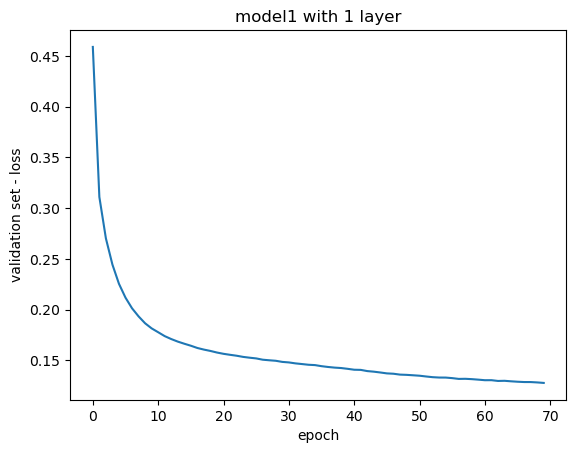

In [46]:
from matplotlib import pyplot as plt

ax = plt.plot(nn_model1.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model1 with 1 layer")

Text(0.5, 1.0, 'model2 with 2 layers')

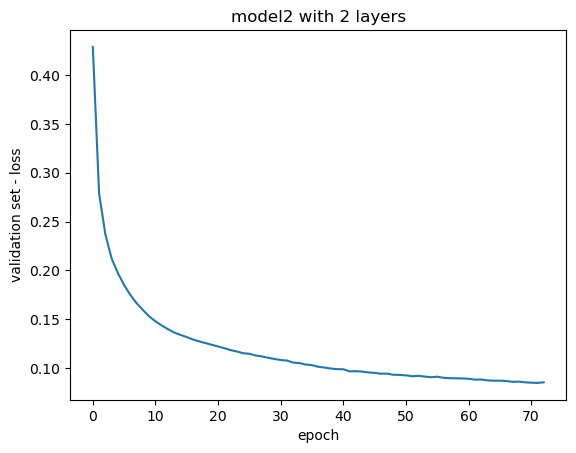

In [47]:
ax = plt.plot(nn_model2.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model2 with 2 layers")

In [ ]:
# Classification reports for NN Models

In [50]:
#model1 classification report

from sklearn.metrics import classification_report
from sklearn import metrics

print("Prediction results on test set - NN model with 1 hidden layer")
print("=======================================================================")
y_pred = nn_model1.predict(x_test_std)
print(classification_report(y_test,y_pred))

Prediction results on test set - NN model with 1 hidden layer
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3307
           1       0.15      0.58      0.24        79

    accuracy                           0.91      3386
   macro avg       0.57      0.75      0.60      3386
weighted avg       0.97      0.91      0.94      3386



In [51]:
# model2 classification report

from sklearn.metrics import classification_report
from sklearn import metrics

print("Prediction results on test set - NN model with 2 hidden layers")
print("=======================================================================")
y_pred = nn_model2.predict(x_test_std)
print(classification_report(y_test,y_pred))

Prediction results on test set - NN model with 2 hidden layers
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3307
           1       0.18      0.53      0.27        79

    accuracy                           0.93      3386
   macro avg       0.59      0.74      0.62      3386
weighted avg       0.97      0.93      0.95      3386



In [ ]:
# Extracting weights from the model

In [52]:
# weights from model 1

print("Model1 with one hidden layer with 50 nodes")
print(len(nn_model1.coefs_))
print("weights between input layer and hidden layer", nn_model1.coefs_[0].shape)
print("weights between hidden layer and output layer",nn_model1.coefs_[1].shape)


print("biases for nn model 1 ")
print(len(nn_model1.intercepts_))
print("biases to hidden layer 1",nn_model1.intercepts_[0].shape)
print("biases to output layer",nn_model1.intercepts_[1].shape)

Model1 with one hidden layer with 50 nodes
2
weights between input layer and hidden layer (30, 10)
weights between hidden layer and output layer (10, 1)
biases for nn model 1 
2
biases to hidden layer 1 (10,)
biases to output layer (1,)


(30,10): number of nodes in input layer and hidden layer are 30 and 10, respectively.
(10,1): number of nodes in hidden layer and output layer are 10, and 1, respectively.

In [53]:
# weights from model 2
print("Model2 with two hidden layers with 50 nodes")
print(len(nn_model2.coefs_))
print("weights between input layer and hidden layer1", nn_model2.coefs_[0].shape)
print("weights between hidden layer1 and hidden layer2",nn_model2.coefs_[1].shape)
print("weights between hidden layer2 and output layer",nn_model2.coefs_[2].shape)


print("biases for nn model 2 ")
print(len(nn_model2.intercepts_))
print("biases to hidden layer 1",nn_model2.intercepts_[0].shape)
print("biases to hidden layer 2",nn_model2.intercepts_[1].shape)
print("biases to output layer",nn_model2.intercepts_[2].shape)

Model2 with two hidden layers with 50 nodes
3
weights between input layer and hidden layer1 (30, 10)
weights between hidden layer1 and hidden layer2 (10, 10)
weights between hidden layer2 and output layer (10, 1)
biases for nn model 2 
3
biases to hidden layer 1 (10,)
biases to hidden layer 2 (10,)
biases to output layer (1,)


(30,10): number of nodes in input layer and first hidden layer are 30 and 10, respectively.
(10,10): number of nodes in first hidden layer and second hidden layer are 10, and 10, respectively.
(10,1): number of nodes in last hidden layer and output layer are 10, and 1, respectively.